<a href="https://colab.research.google.com/github/teigoonishi/teigoonishi.github.io/blob/master/Parallel_Programming_1_Delaying_Computation_with_Dask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from math import sqrt
def f(z):
  return sqrt(z+4)

def g(y):
  return y - 3

def h(x):
  return x ** 2

In [ ]:
x = 4

from dask import delayed
y = delayed(h)(x)
z = delayed(g)(y)
w = delayed(f)(z)
print(w)

# w= dask delayed object
type(w)

Delayed('f-06c0449d-2d3b-4fab-9d8b-b5a0a83f7ebf')


dask.delayed.Delayed

In [ ]:
# computed
w.compute()

4.123105625617661

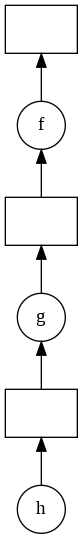

In [ ]:
w.visualize()

In [ ]:
f = delayed(f)
g = delayed(g)
h = delayed(h)
w = f( g( h(4) ) )

type(w) # a dask delayed object

dask.delayed.Delayed

In [ ]:
w.compute() # Computation occurs now

4.123105625617661

In [ ]:
template = 'yellow_tripdata_2015-{:02d}.csv'
filenames = [template.format(k) for k in range(1,13)]

@delayed
  def count_long_trips(df):
    df['duration'] = (df.tpep_dropoff_datetime - 
                      df.tpep_pickupp_datetime).dt.seconds)
    is_long_trip = df.duraton > 1200
    result_dict = {'n_long':[sum(is_long_trip)],
                   'n_total':[len(df)]}
    return pd.DataFrame(result_dict)

@delayed
  def read_file(fname):
    return pd.read_csv(fname, parse_dates=[1,2])

totals = [count_long_trips(read_file(fname)) for fname in filenames]
annual_totals = sum(totals)
annual_totals = annual_totals.compute()